# __Algerian Forest Fire Dataset linear regression modelling__

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",header=1)
data

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
241  6.5       fire     
242    0   not fire     
243  0.2   not fire     
244  0.7   not fire     
245  0.5  not fire      

[246 rows x 14 columns]

In [3]:
data[data.isna().any(axis=1)]
data.iloc[121:125,:]
data.drop([122,123],inplace=True)
data.reset_index(inplace=True)
data.drop(['index',"day","month","year"],axis=1,inplace=True)
data["region"] = None
data.iloc[:122,-1] = "Bejaia"
data.iloc[122:,-1] = "Abbes"
data

Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  FWI     Classes    \
0            29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5   not fire      
1            29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4   not fire      
2            26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   not fire      
3            25  89  13   2.5  28.6  1.3   6.9    0   1.7    0   not fire      
4            27  77  16     0  64.8    3  14.2  1.2   3.9  0.5   not fire      
..          ...  ..  ..   ...   ...  ...   ...  ...   ...  ...           ...   
239          30  65  14     0  85.4   16  44.5  4.5  16.9  6.5       fire      
240          28  87  15   4.4  41.1  6.5     8  0.1   6.2    0   not fire      
241          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   not fire      
242          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   not fire      
243          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5  not fire       

     region  
0    Bejaia  
1    Bejaia  
2    Bejaia  
3    Bejaia  
4    Bejaia  
..      ...  
239   Abbes  
240   Abbes  
241   Abbes  
242   Abbes  
243   Abbes  

[244 rows x 12 columns]

# __Data cleaning operations__

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  244 non-null    object
 1    RH          244 non-null    object
 2    Ws          244 non-null    object
 3   Rain         244 non-null    object
 4   FFMC         244 non-null    object
 5   DMC          244 non-null    object
 6   DC           244 non-null    object
 7   ISI          244 non-null    object
 8   BUI          244 non-null    object
 9   FWI          244 non-null    object
 10  Classes      244 non-null    object
 11  region       244 non-null    object
dtypes: object(12)
memory usage: 23.0+ KB


Getting unique values from y data column:  
Getting unique values from a column involves identifying and selecting only the distinct or unique values in that column.

In [5]:
data["Classes  "].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

Apply `str.strip()` to clean the data:  
As we can see y data has some blank spaces so we need to remove then before use.  
I have used the `.strip()` method in Python to remove the leading and trailing spaces from the data in a column.

In [6]:
data["Classes  "] = data["Classes  "].str.strip()

In [7]:
data

Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  FWI Classes    \
0            29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5  not fire   
1            29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4  not fire   
2            26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1  not fire   
3            25  89  13   2.5  28.6  1.3   6.9    0   1.7    0  not fire   
4            27  77  16     0  64.8    3  14.2  1.2   3.9  0.5  not fire   
..          ...  ..  ..   ...   ...  ...   ...  ...   ...  ...       ...   
239          30  65  14     0  85.4   16  44.5  4.5  16.9  6.5      fire   
240          28  87  15   4.4  41.1  6.5     8  0.1   6.2    0  not fire   
241          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2  not fire   
242          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7  not fire   
243          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5  not fire   

     region  
0    Bejaia  
1    Bejaia  
2    Bejaia  
3    Bejaia  
4    Bejaia  
..      ...  
239   Abbes  
240   Abbes  
241   Abbes  
242   Abbes  
243   Abbes  

[244 rows x 12 columns]

In [8]:
data["Classes  "].unique()

array(['not fire', 'fire'], dtype=object)

Convert data type of all data column:  
In below code I am selecting all data which are intiger and making the column data type as float64

In [9]:
columns = data.columns[:-2]
for i in columns:
    data[i] = data[i].astype("float64")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    float64
 1    RH          244 non-null    float64
 2    Ws          244 non-null    float64
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           244 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          244 non-null    float64
 10  Classes      244 non-null    object 
 11  region       244 non-null    object 
dtypes: float64(10), object(2)
memory usage: 23.0+ KB


## __EDA for data set__

Summarize dataset:  96%|█████████▌| 120/125 [00:17<00:00,  8.56it/s, Missing diagram matrix]         /home/sanjiv/anaconda3/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_co

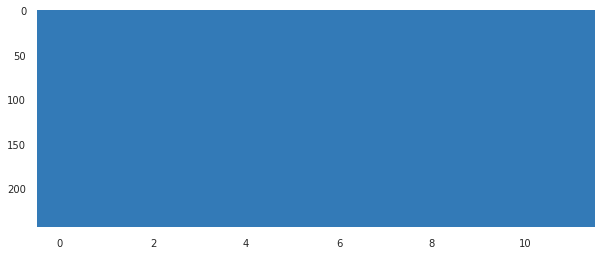

In [10]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

In [11]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(data)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [12]:
data.columns

Index(['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes  ', 'region'],
      dtype='object')

In [13]:
data.describe()

Temperature          RH          Ws       Rain         FFMC  \
count   244.000000  244.000000  244.000000  244.000000  244.000000   
mean     32.172131   61.938525   15.504098    0.760656   77.887705   
std       3.633843   14.884200    2.810178    1.999406   14.337571   
min      22.000000   21.000000    6.000000    0.000000   28.600000   
25%      30.000000   52.000000   14.000000    0.000000   72.075000   
50%      32.000000   63.000000   15.000000    0.000000   83.500000   
75%      35.000000   73.250000   17.000000    0.500000   88.300000   
max      42.000000   90.000000   29.000000   16.800000   96.000000   

              DMC          DC         ISI         BUI         FWI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean    14.673361   49.288115    4.759836   16.673361    7.049180  
std     12.368039   47.619662    4.154628   14.201648    7.428366  
min      0.700000    6.900000    0.000000    1.100000    0.000000  
25%      5.800000   13.275000    1.400000    6.000000    0.700000  
50%     11.300000   33.100000    3.500000   12.450000    4.450000  
75%     20.750000   68.150000    7.300000   22.525000   11.375000  
max     65.900000  220.400000   19.000000   68.000000   31.100000

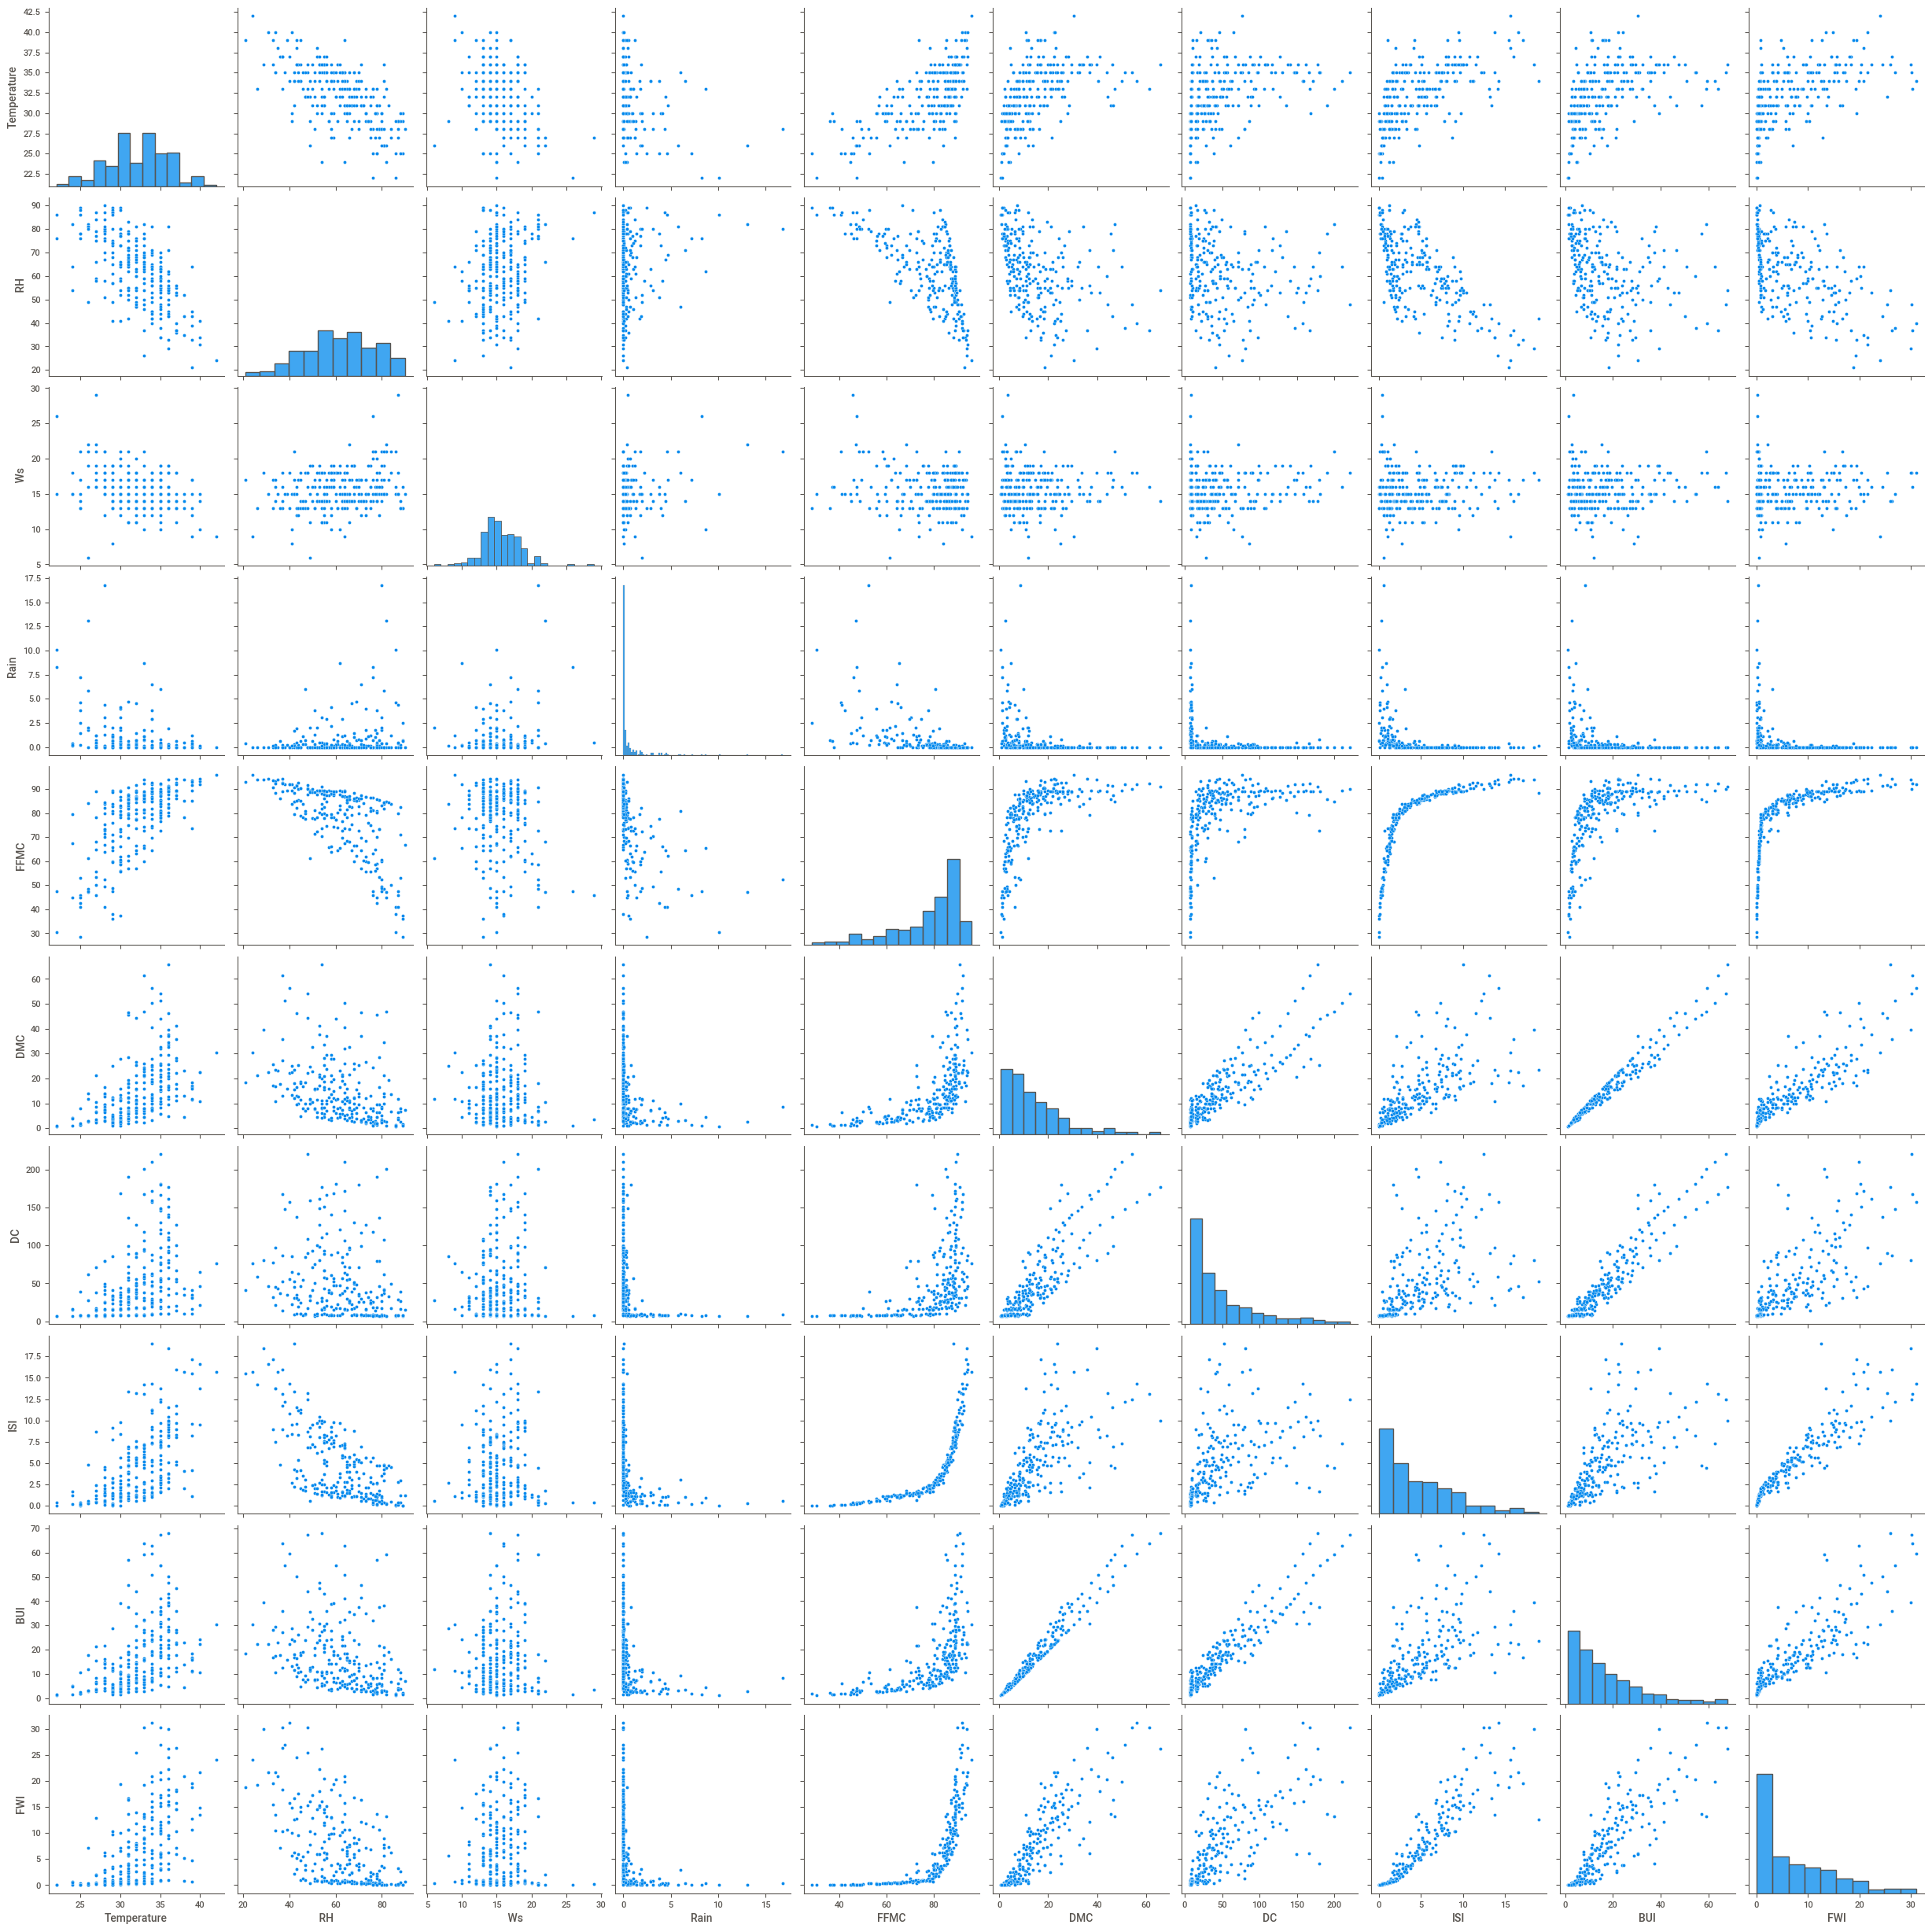

In [14]:
sns.pairplot(data)

From above `pairplot` we can see `Temperature`, `RH` and `Ws` are seems like normally distributed so we need to do `Normality tests` for same

## univariate analysis  
Univariate analysis is a statistical analysis technique that focuses on analyzing a single variable at a time. It is a type of data analysis that involves examining the distribution, central tendency, and dispersion of a single variable without considering any other variable. Univariate analysis is useful in summarizing and understanding the characteristics of a single variable, such as its range, mean, median, mode, and standard deviation.  
  
  
univariate analysis techniques include descriptive statistics such as frequency distribution, histograms, bar charts, and box plots. These techniques can help to identify outliers, missing values, and other patterns in the data.

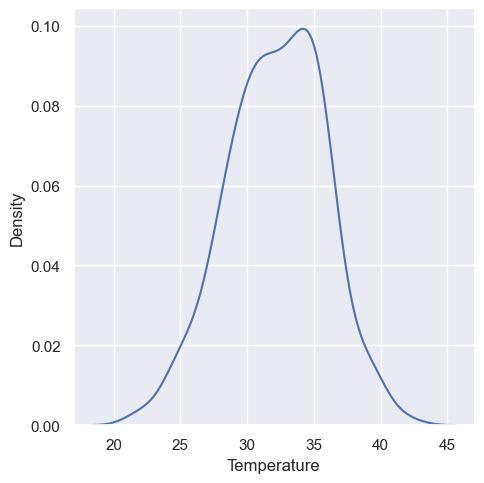

In [15]:
# analysis for Temperature
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data=data["Temperature"],kind="kde")

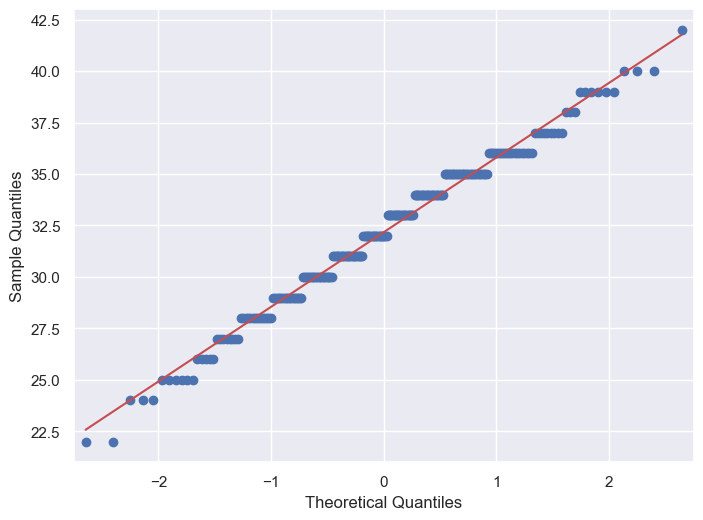

In [16]:
from numpy.random import seed
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# q-q plot
qqplot(data["Temperature"], line='s')
pyplot.show()

The `normaltest` is a statistical test used to determine whether a given sample of data follows a normal distribution or not. The test is based on the null hypothesis that the sample is normally distributed, and the alternative hypothesis that it is not.

In [17]:
from scipy.stats import normaltest
normaltest(data["Temperature"])

NormaltestResult(statistic=1.7805389205299786, pvalue=0.41054511225166823)

We can see p-value for `Temperature` is `0.41054511225166823` which is greater then 0.05 to we can accept the null hypothesis  
  
i.e `Temperature` is normally distributed

In [18]:
from scipy.stats import kurtosis
from scipy.stats import skew

print(skew(data["Temperature"],bias=True))
print(kurtosis(data["Temperature"],bias=True))

-0.1950999958767491
-0.17565616412106388


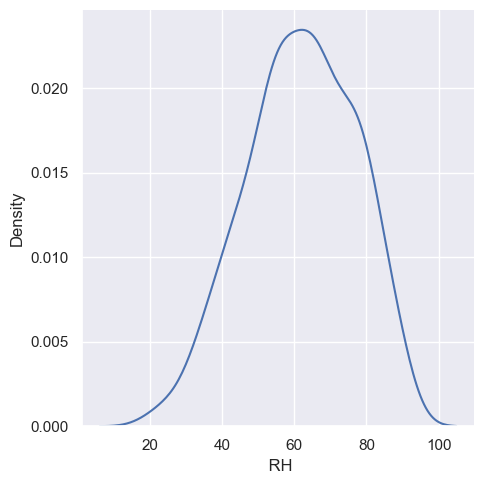

In [19]:
# analysis for Temperature
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data=data[" RH"],kind="kde")

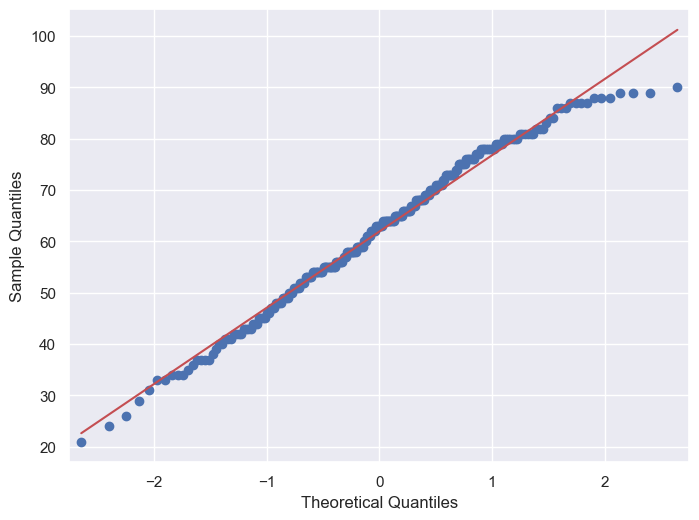

In [20]:
qqplot(data[" RH"], line='s')
pyplot.show()

In [21]:
from scipy.stats import normaltest
normaltest(data[" RH"])

NormaltestResult(statistic=7.260230503875478, pvalue=0.0265131285433602)

In [22]:
print(skew(data[" RH"],bias=True))
print(kurtosis(data[" RH"],bias=True))

-0.2364989921040004
-0.5440124652305531


We can see p-value for `RH` is `0.0265131285433602` which is less then 0.05 to we can reject the null hypothesis  
  
i.e `RH` is not normally distributed

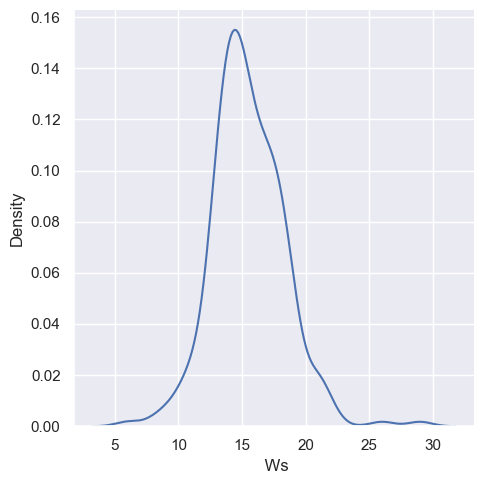

In [23]:
# analysis for Ws
sns.set(rc={'figure.figsize':(8,6)})
sns.displot(data=data[" Ws"],kind="kde")

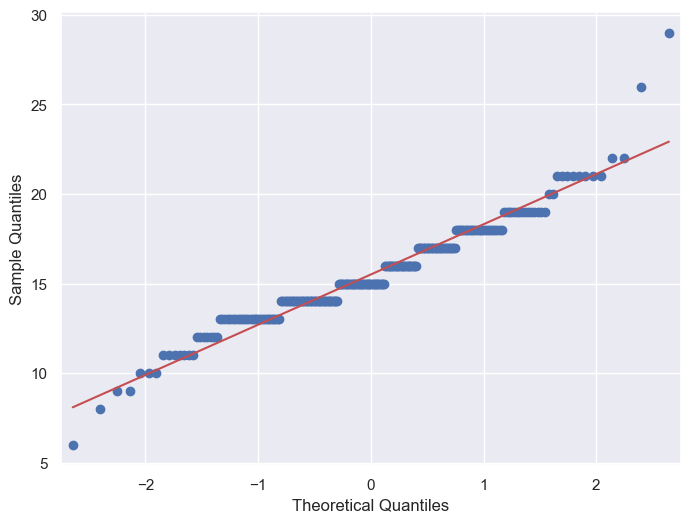

In [24]:
qqplot(data[" Ws"], line='s')
pyplot.show()

In [25]:
from scipy.stats import normaltest
normaltest(data[" Ws"])

NormaltestResult(statistic=30.110834461628137, pvalue=2.894112266037264e-07)

In [26]:
print(skew(data[" Ws"],bias=True))
print(kurtosis(data[" Ws"],bias=True))

0.5425196754701939
2.5246482239889394


We can see p-value for `Ws` is `2.894112266037264e-07` which is less then 0.05 to we can reject the null hypothesis  
  
i.e `Ws` is not normally distributed

## __Biveriot analysis__

In [28]:
data.describe()

Temperature          RH          Ws       Rain         FFMC  \
count   244.000000  244.000000  244.000000  244.000000  244.000000   
mean     32.172131   61.938525   15.504098    0.760656   77.887705   
std       3.633843   14.884200    2.810178    1.999406   14.337571   
min      22.000000   21.000000    6.000000    0.000000   28.600000   
25%      30.000000   52.000000   14.000000    0.000000   72.075000   
50%      32.000000   63.000000   15.000000    0.000000   83.500000   
75%      35.000000   73.250000   17.000000    0.500000   88.300000   
max      42.000000   90.000000   29.000000   16.800000   96.000000   

              DMC          DC         ISI         BUI         FWI  
count  244.000000  244.000000  244.000000  244.000000  244.000000  
mean    14.673361   49.288115    4.759836   16.673361    7.049180  
std     12.368039   47.619662    4.154628   14.201648    7.428366  
min      0.700000    6.900000    0.000000    1.100000    0.000000  
25%      5.800000   13.275000    1.400000    6.000000    0.700000  
50%     11.300000   33.100000    3.500000   12.450000    4.450000  
75%     20.750000   68.150000    7.300000   22.525000   11.375000  
max     65.900000  220.400000   19.000000   68.000000   31.100000

In [29]:
data.corr()

Temperature        RH        Ws     Rain       FFMC       DMC  \
Temperature     1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105   
 RH            -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133   
 Ws            -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246   
Rain           -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548   
FFMC            0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391   
DMC             0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000   
DC              0.370498 -0.220330  0.076245 -0.296804  0.503910  0.875358   
ISI             0.605971 -0.688268  0.012245 -0.347862  0.740751  0.678355   
BUI             0.456415 -0.349685  0.030303 -0.299409  0.590251  0.982206   
FWI             0.566839 -0.580457  0.033957 -0.324755  0.691430  0.875191   

                   DC       ISI       BUI       FWI  
Temperature  0.370498  0.605971  0.456415  0.566839  
 RH         -0.220330 -0.688268 -0.349685 -0.580457  
 Ws          0.076245  0.012245  0.030303  0.033957  
Rain        -0.296804 -0.347862 -0.299409 -0.324755  
FFMC         0.503910  0.740751  0.590251  0.691430  
DMC          0.875358  0.678355  0.982206  0.875191  
DC           1.000000  0.503919  0.941672  0.737041  
ISI          0.503919  1.000000  0.641351  0.922422  
BUI          0.941672  0.641351  1.000000  0.856912  
FWI          0.737041  0.922422  0.856912  1.000000

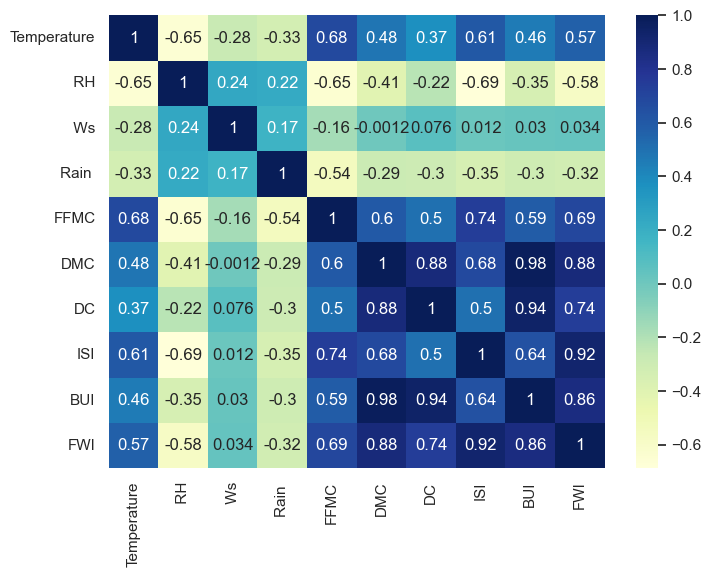

In [30]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

## __Hypothysis testing__

What is a Mann-Whitney U test?  

The Mann-Whitney U test, also known as the Wilcoxon rank-sum test, is a non-parametric statistical test used to compare two independent groups of data that are not normally distributed. It is a useful alternative to the t-test, which assumes that the data is normally distributed.  


In [31]:
from scipy.stats import ttest_ind
ttest_ind(data[data["Classes  "] == "fire"]["Temperature"],data[data["Classes  "] != "fire"]["Temperature"])

Ttest_indResult(statistic=9.423536449577796, pvalue=3.665914717669193e-18)

there is a significant difference in distributions for `Temperature` when fire and not fire

In [32]:
from scipy.stats import mannwhitneyu
mannwhitneyu(data[data["Classes  "] == "fire"][" RH"],data[data["Classes  "] != "fire"][" RH"])

MannwhitneyuResult(statistic=3700.5, pvalue=3.7651087930605746e-11)

there is a significant difference in distributions for `RH` when fire and not fire

In [33]:
mannwhitneyu(data[data["Classes  "] == "fire"][" Ws"],data[data["Classes  "] != "fire"][" Ws"])

MannwhitneyuResult(statistic=7148.0, pvalue=0.7601300563655673)

there is no significant difference in distributions for `Ws` when fire and not fire

In [34]:
mannwhitneyu(data[data["Classes  "] == "fire"]["Rain "],data[data["Classes  "] != "fire"]["Rain "])

MannwhitneyuResult(statistic=2013.0, pvalue=3.0087110412485163e-26)

there is a significant difference in distributions for `Rain` when fire and not fire

In [35]:
mannwhitneyu(data[data["Classes  "] == "fire"]["FFMC"],data[data["Classes  "] != "fire"]["FFMC"])

MannwhitneyuResult(statistic=14604.0, pvalue=1.3687976313621596e-40)

there is a significant difference in distributions for `FFMC` when fire and not fire

In [36]:
mannwhitneyu(data[data["Classes  "] == "fire"]["DMC"],data[data["Classes  "] != "fire"]["DMC"])

MannwhitneyuResult(statistic=13419.5, pvalue=5.619625810682857e-29)

there is a significant difference in distributions for `DMC` when fire and not fire

In [37]:
mannwhitneyu(data[data["Classes  "] == "fire"]["DC"],data[data["Classes  "] != "fire"]["DC"])

MannwhitneyuResult(statistic=13012.5, pvalue=1.8727139327610821e-25)

there is a significant difference in distributions for `DC` when fire and not fire

In [38]:
mannwhitneyu(data[data["Classes  "] == "fire"]["ISI"],data[data["Classes  "] != "fire"]["ISI"])

MannwhitneyuResult(statistic=14610.0, pvalue=1.1675868001492136e-40)

In [39]:
mannwhitneyu(data[data["Classes  "] == "fire"]["BUI"],data[data["Classes  "] != "fire"]["BUI"])

MannwhitneyuResult(statistic=13398.0, pvalue=8.749537975061532e-29)

In [40]:
mannwhitneyu(data[data["Classes  "] == "fire"]["FWI"],data[data["Classes  "] != "fire"]["FWI"])

MannwhitneyuResult(statistic=14481.5, pvalue=2.615638636647991e-39)

We can validate the findings in Hypothysis testing with below `pairplot`  
  
`Ws` has almost same distribution for `fire` and `non-fire` data

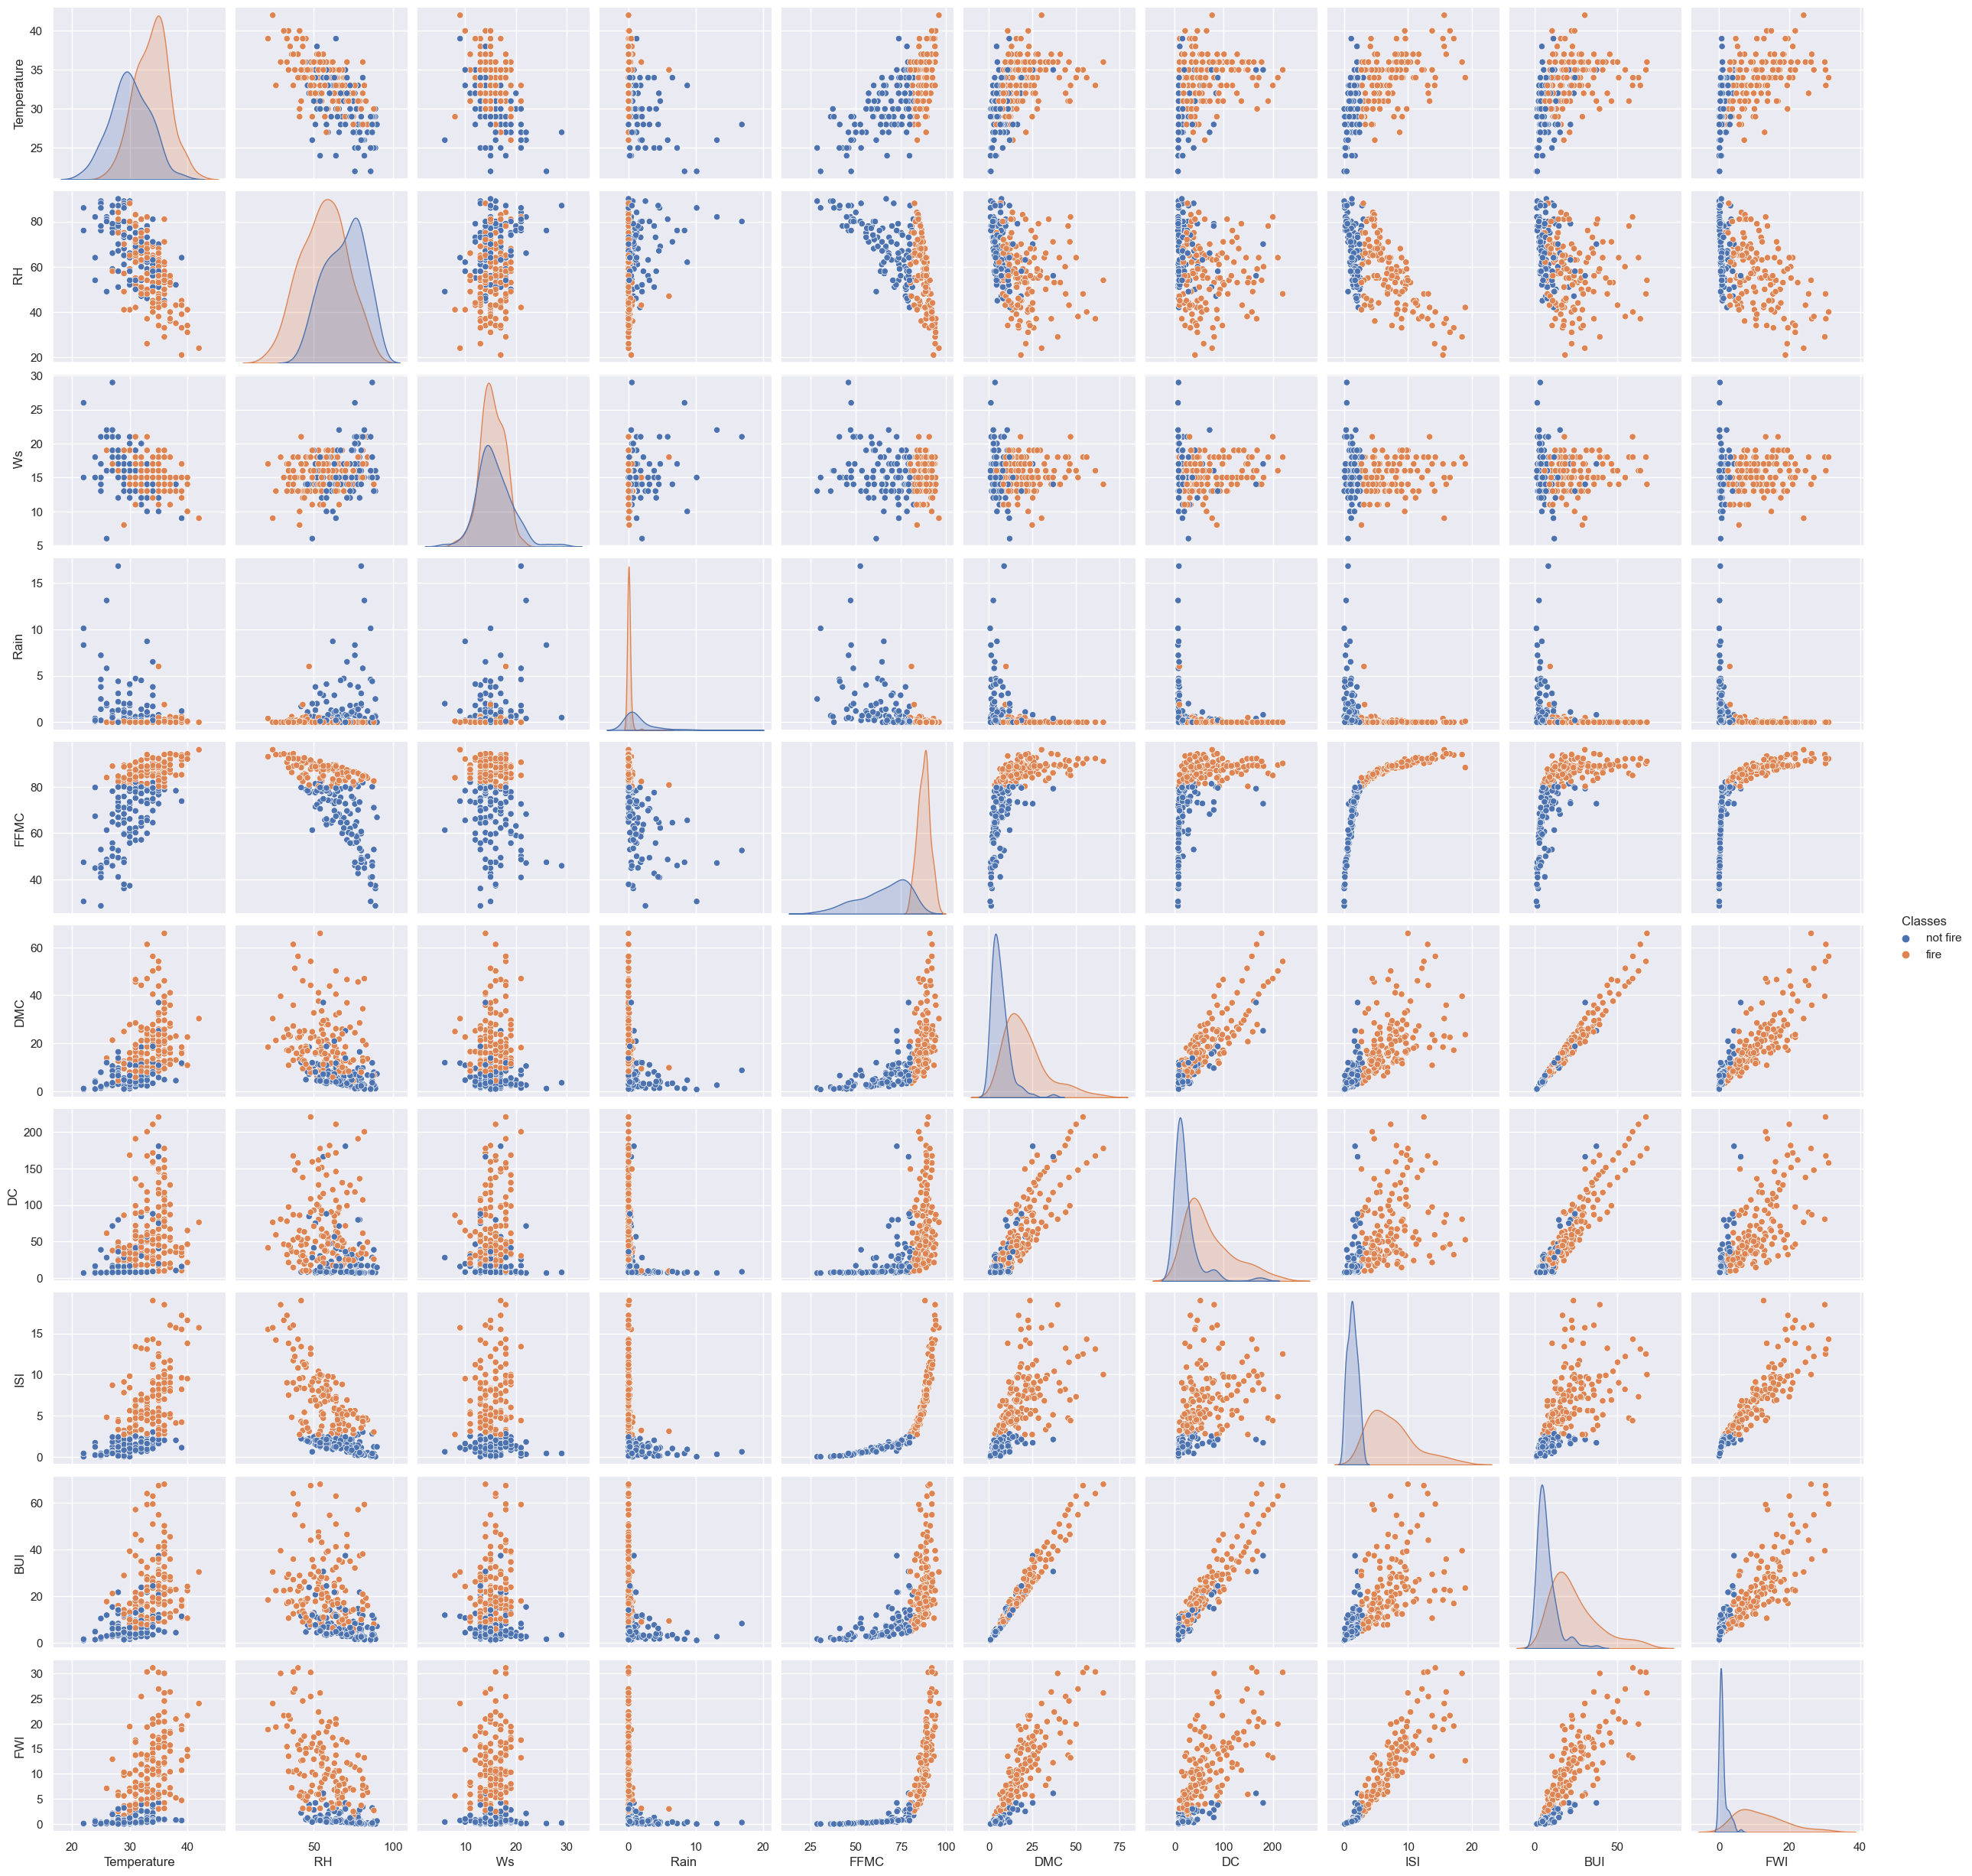

In [41]:
sns.pairplot(data,hue="Classes  ")

Now we are need to test `Region` has any impact on `fire` or not  
  
since `Region` and `Classes` both are categorical data so I am using `fisher_exact` for testing

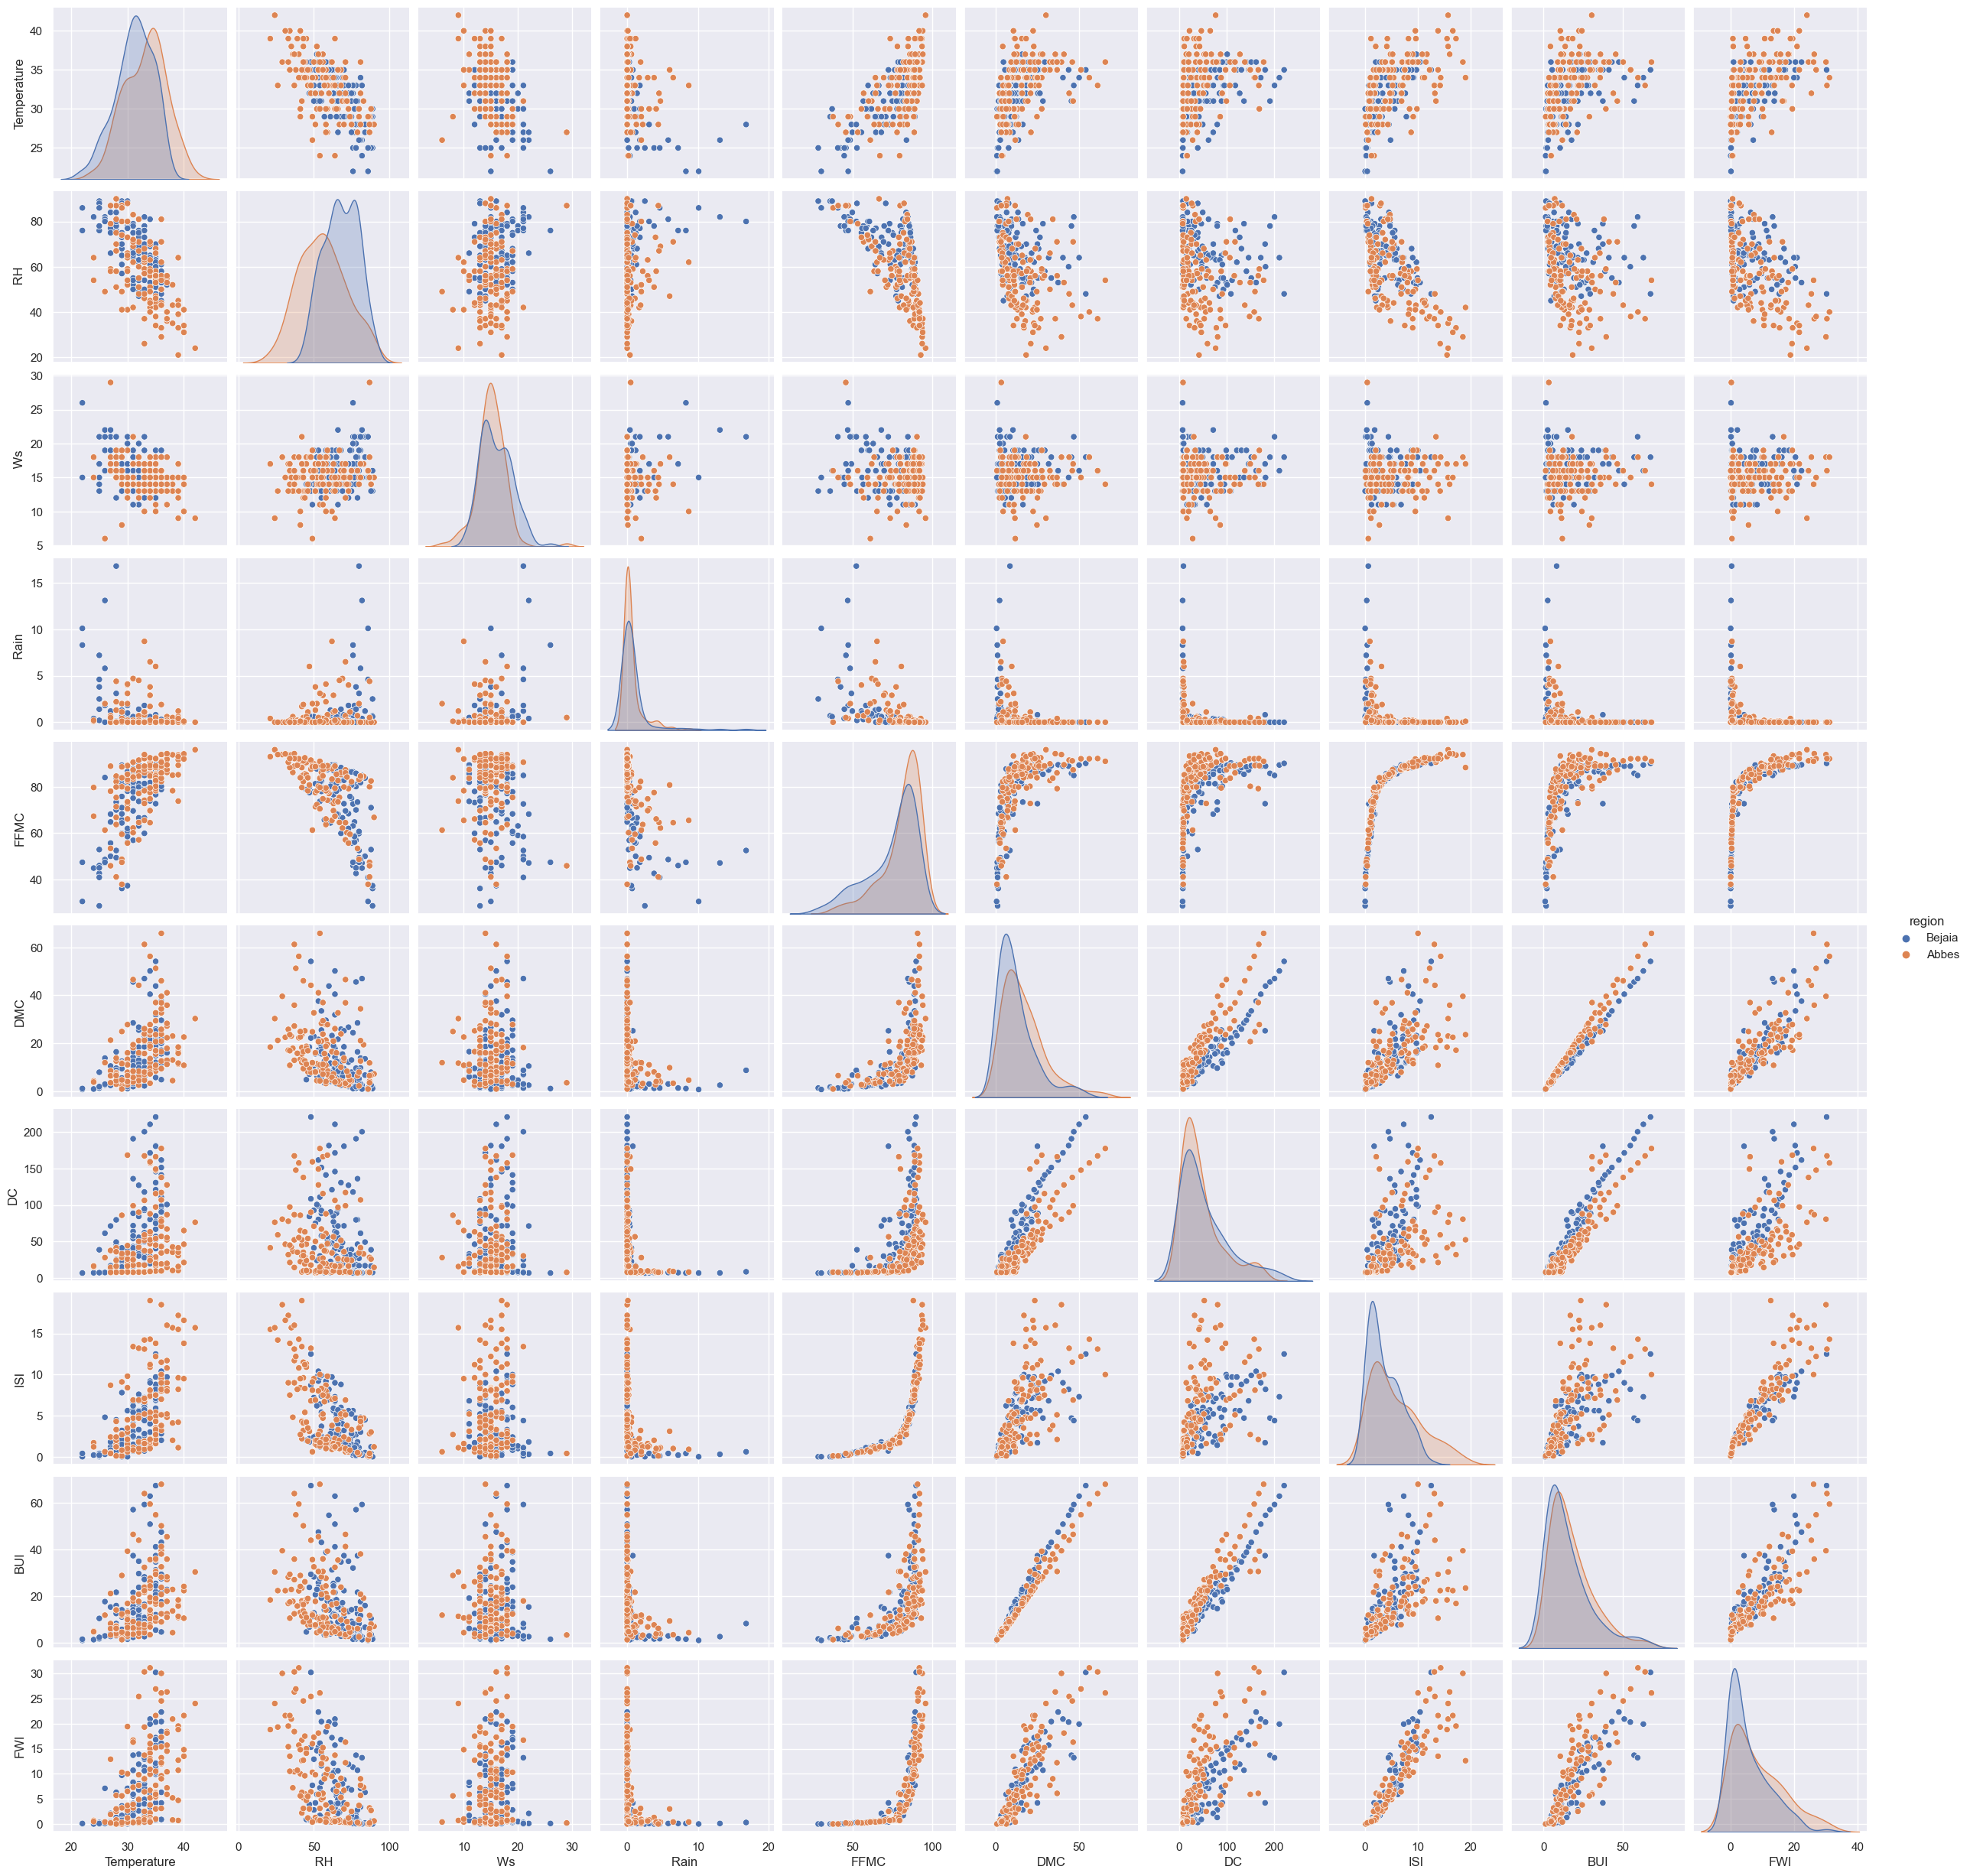

In [42]:
sns.pairplot(data,hue="region")

In [43]:
data_crosstab = pd.crosstab(data["Classes  "],data["region"],margins = False)
print(data_crosstab)

region     Abbes  Bejaia
Classes                 
fire          79      59
not fire      43      63


what is a fisher_exact?  
  
The output of the Fisher's exact test includes the odds ratio, the confidence interval for the odds ratio, and the p-value. If the p-value is less than the significance level (usually 0.05), the null hypothesis of independence is rejected, and it is concluded that there is a significant association between the two categorical variables. Conversely, if the p-value is greater than the significance level, the null hypothesis cannot be rejected, and it is concluded that there is no significant association between the two categorical variables.

In [45]:
from scipy.stats import fisher_exact
fisher_exact(data_crosstab)

(1.9617658651951124, 0.013954999729002686)

In [44]:
fisher_exact(data_crosstab,alternative="greater")

(1.9617658651951124, 0.006977499864501343)

The P-value for `fire` and `region` is `0.006977499864501343` which is less then 0.05 to we reject the null hypothesis.  
i.e there is a significant association between the two categorical variables.

I am converting Rain from numerical to categorical data.  
Reason is While analysing the data I found that rain has 52-56% zero values.  
  
And from EDA for rain, we can see where is rain change for fire is very less, 

So I am changing this dataset from numerical to categorical data.  
  
I will put `rain` if rain > 0 else `not rain`

In [46]:
data["Rain "] = data["Rain "].apply(lambda x: 'not rain' if x == 0 else 'rain')

In [47]:
data_crosstab = pd.crosstab(data["Classes  "],data["Rain "],margins = False)
print(data_crosstab)

Rain       not rain  rain
Classes                  
fire            114    24
not fire         19    87


In [49]:
fisher_exact(data_crosstab)

(21.75, 7.112449017362336e-25)

In [48]:
fisher_exact(data_crosstab,alternative="greater")

(21.75, 3.8242593558010855e-25)

The P-value for `fire` and `Rain` is `3.8242593558010855e-25` which is less then 0.05 to we reject the null hypothesis.  
i.e there is a significant association between the two categorical variables.

Summarize dataset:  95%|█████████▌| 101/106 [00:08<00:00,  8.41it/s, Missing diagram matrix]         /home/sanjiv/anaconda3/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Matrix missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Matrix": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_co

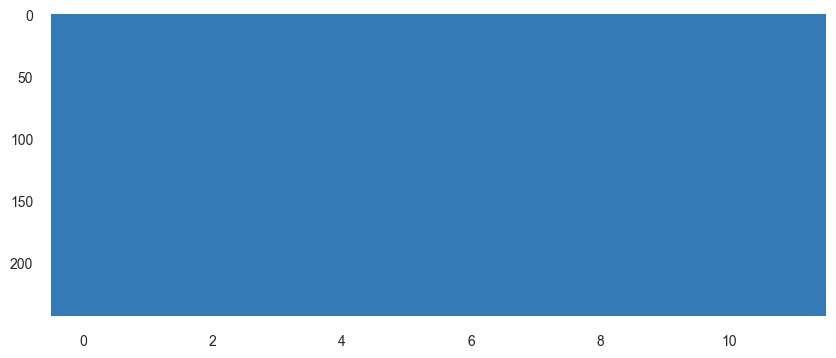

In [50]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data, explorative=True)

#Saving results to a HTML file
profile.to_file("pandas_profiling.html")

In [51]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(data)

#Saving results to HTML file
sweet_report.show_html('sweet_report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## __Outlier handaling__

<Axes: >

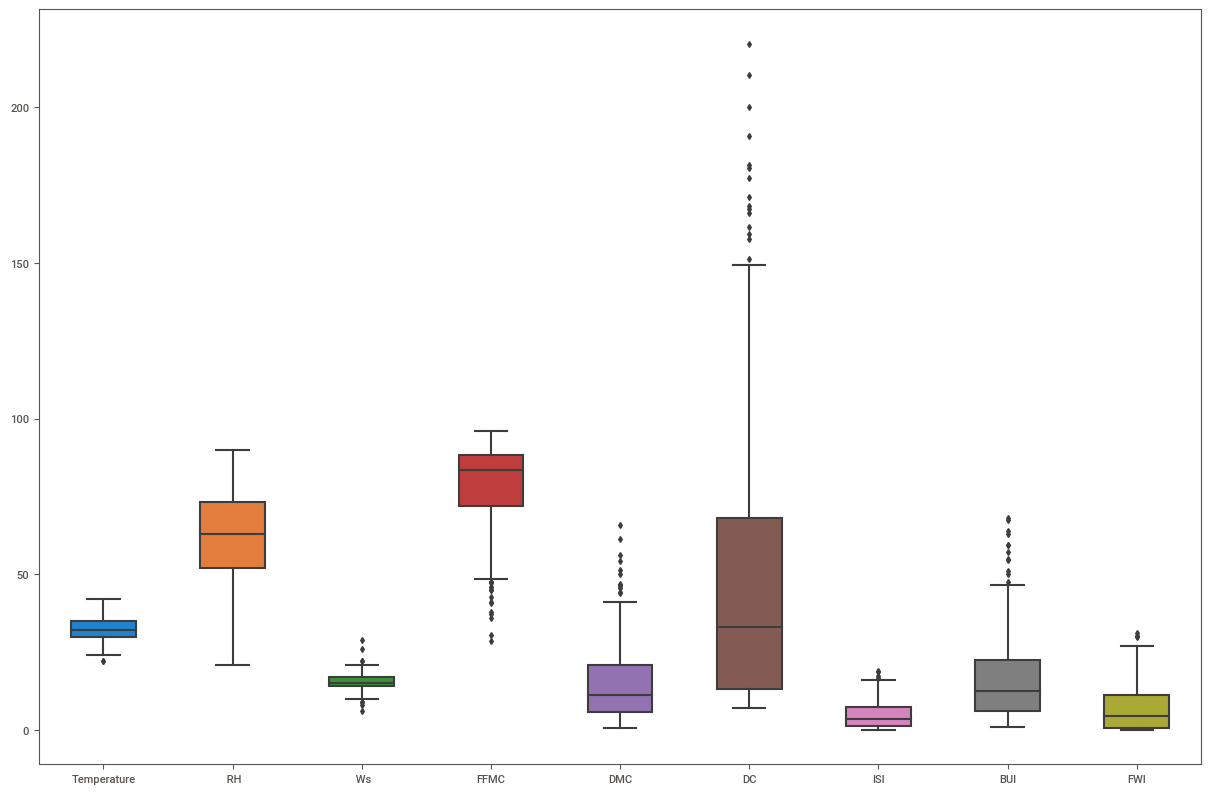

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

In [53]:
# mean is affected by outlier so i am using median for replasing outliers
floate_col = data.select_dtypes([np.number]).columns

In [54]:
for i in floate_col:
    print(i)
    print(data[i].max())
    print(data[i].min())
    print("=========================")


Temperature
42.0
22.0
 RH
90.0
21.0
 Ws
29.0
6.0
FFMC
96.0
28.6
DMC
65.9
0.7
DC
220.4
6.9
ISI
19.0
0.0
BUI
68.0
1.1
FWI
31.1
0.0


In [55]:
for i in floate_col:
    q3 = data[i].quantile(0.75)
    q1 = data[i].quantile(0.25)
    iqr = q3 - q1
    upper = q3 + (1.5 * iqr)
    lower = q1 - (1.5 * iqr)
    median = data[i].median()
    # data[i] = np.where(data[i]>upper,median,data[i])
    # data[i] = np.where(data[i]<lower,median,data[i])
    data[i] = data[i].apply(lambda x: median if (x < lower) | (x > upper) else x)

In [56]:
for i in floate_col:
    print(i)
    print(data[i].max())
    print(data[i].min())
    print("=========================")


Temperature
42.0
24.0
 RH
90.0
21.0
 Ws
21.0
10.0
FFMC
96.0
48.6
DMC
41.1
0.7
DC
149.2
6.9
ISI
16.0
0.0
BUI
46.5
1.1
FWI
26.9
0.0


<Axes: >

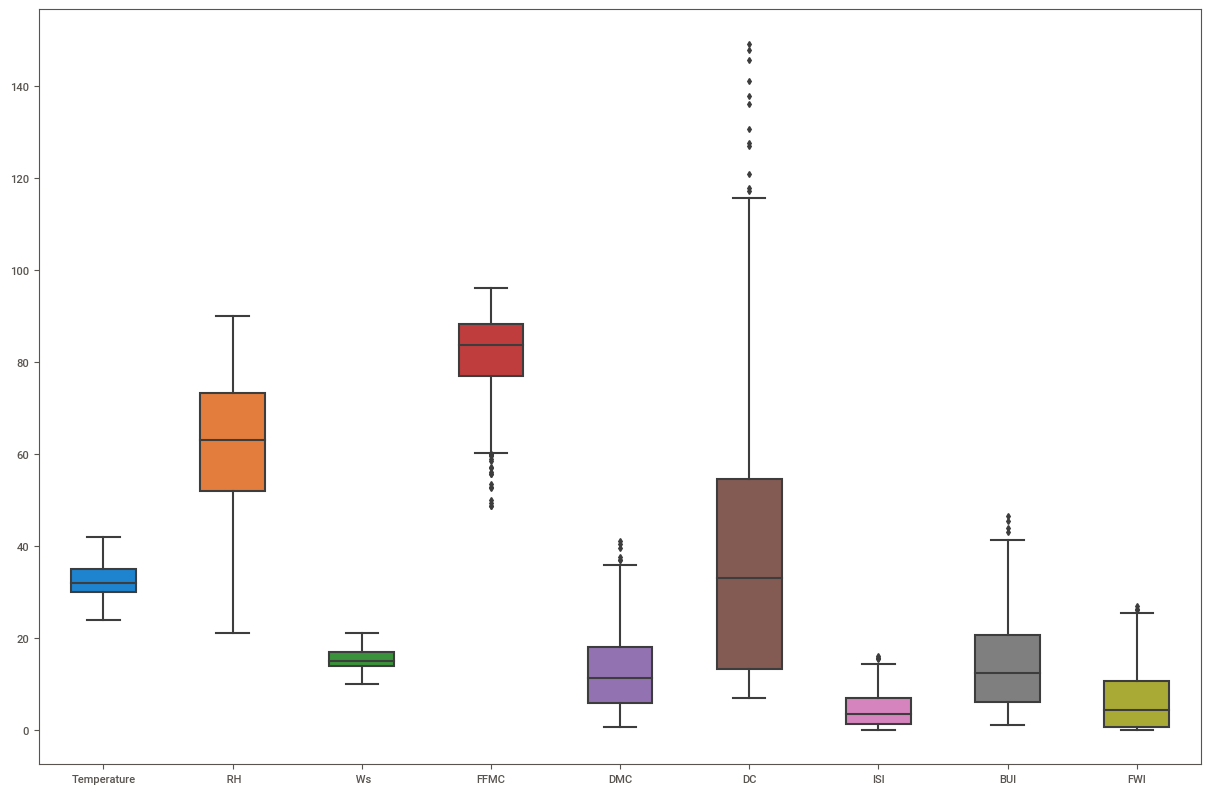

In [57]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

## __Data standardization and data imputetion for zero values__

### __data imputetion for zero values__

In [58]:
for i in floate_col:
    count = (data[i] == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

Count of zeros in column  Temperature  is :  0
Count of zeros in column   RH  is :  0
Count of zeros in column   Ws  is :  0
Count of zeros in column  FFMC  is :  0
Count of zeros in column  DMC  is :  0
Count of zeros in column  DC  is :  0
Count of zeros in column  ISI  is :  4
Count of zeros in column  BUI  is :  0
Count of zeros in column  FWI  is :  9


In [59]:
for i in floate_col:
    mean = data[i].mean()
    data[i] = data[i].apply(lambda x: mean if (x == 0) else x)

In [60]:
for i in floate_col:
    count = (data[i] == 0).sum()
    print('Count of zeros in column ', i, ' is : ', count)

Count of zeros in column  Temperature  is :  0
Count of zeros in column   RH  is :  0
Count of zeros in column   Ws  is :  0
Count of zeros in column  FFMC  is :  0
Count of zeros in column  DMC  is :  0
Count of zeros in column  DC  is :  0
Count of zeros in column  ISI  is :  0
Count of zeros in column  BUI  is :  0
Count of zeros in column  FWI  is :  0


### Appling Box-Cox on dataset to make is notmalize  
Whether to apply the Box-Cox transformation before or after splitting the data into training and testing sets depends on the purpose of the transformation and the nature of your data.

If the purpose of the transformation is to normalize the data or to remove skewness, it is generally recommended to apply the transformation before splitting the data. This is because the Box-Cox transformation is a data-driven method that estimates the optimal transformation parameter based on the entire dataset, and applying it before splitting ensures that the same transformation is applied consistently to both the training and testing sets.

However, if the purpose of the transformation is to reduce the impact of outliers, it may be more appropriate to apply the transformation after splitting the data. This is because outliers in the training set can have a large influence on the estimated transformation parameter, which may result in overfitting to the training set and poor generalization performance on the testing set. In this case, it may be more appropriate to estimate the transformation parameter using only the training set, and then apply the same transformation to both the training and testing sets.

In general, it is important to carefully consider the purpose of the transformation and the characteristics of your data before deciding whether to apply the Box-Cox transformation before or after splitting the data.

In [61]:
from scipy.stats import boxcox
for i in floate_col[1:]:
    data[i],_ = boxcox(data[i])

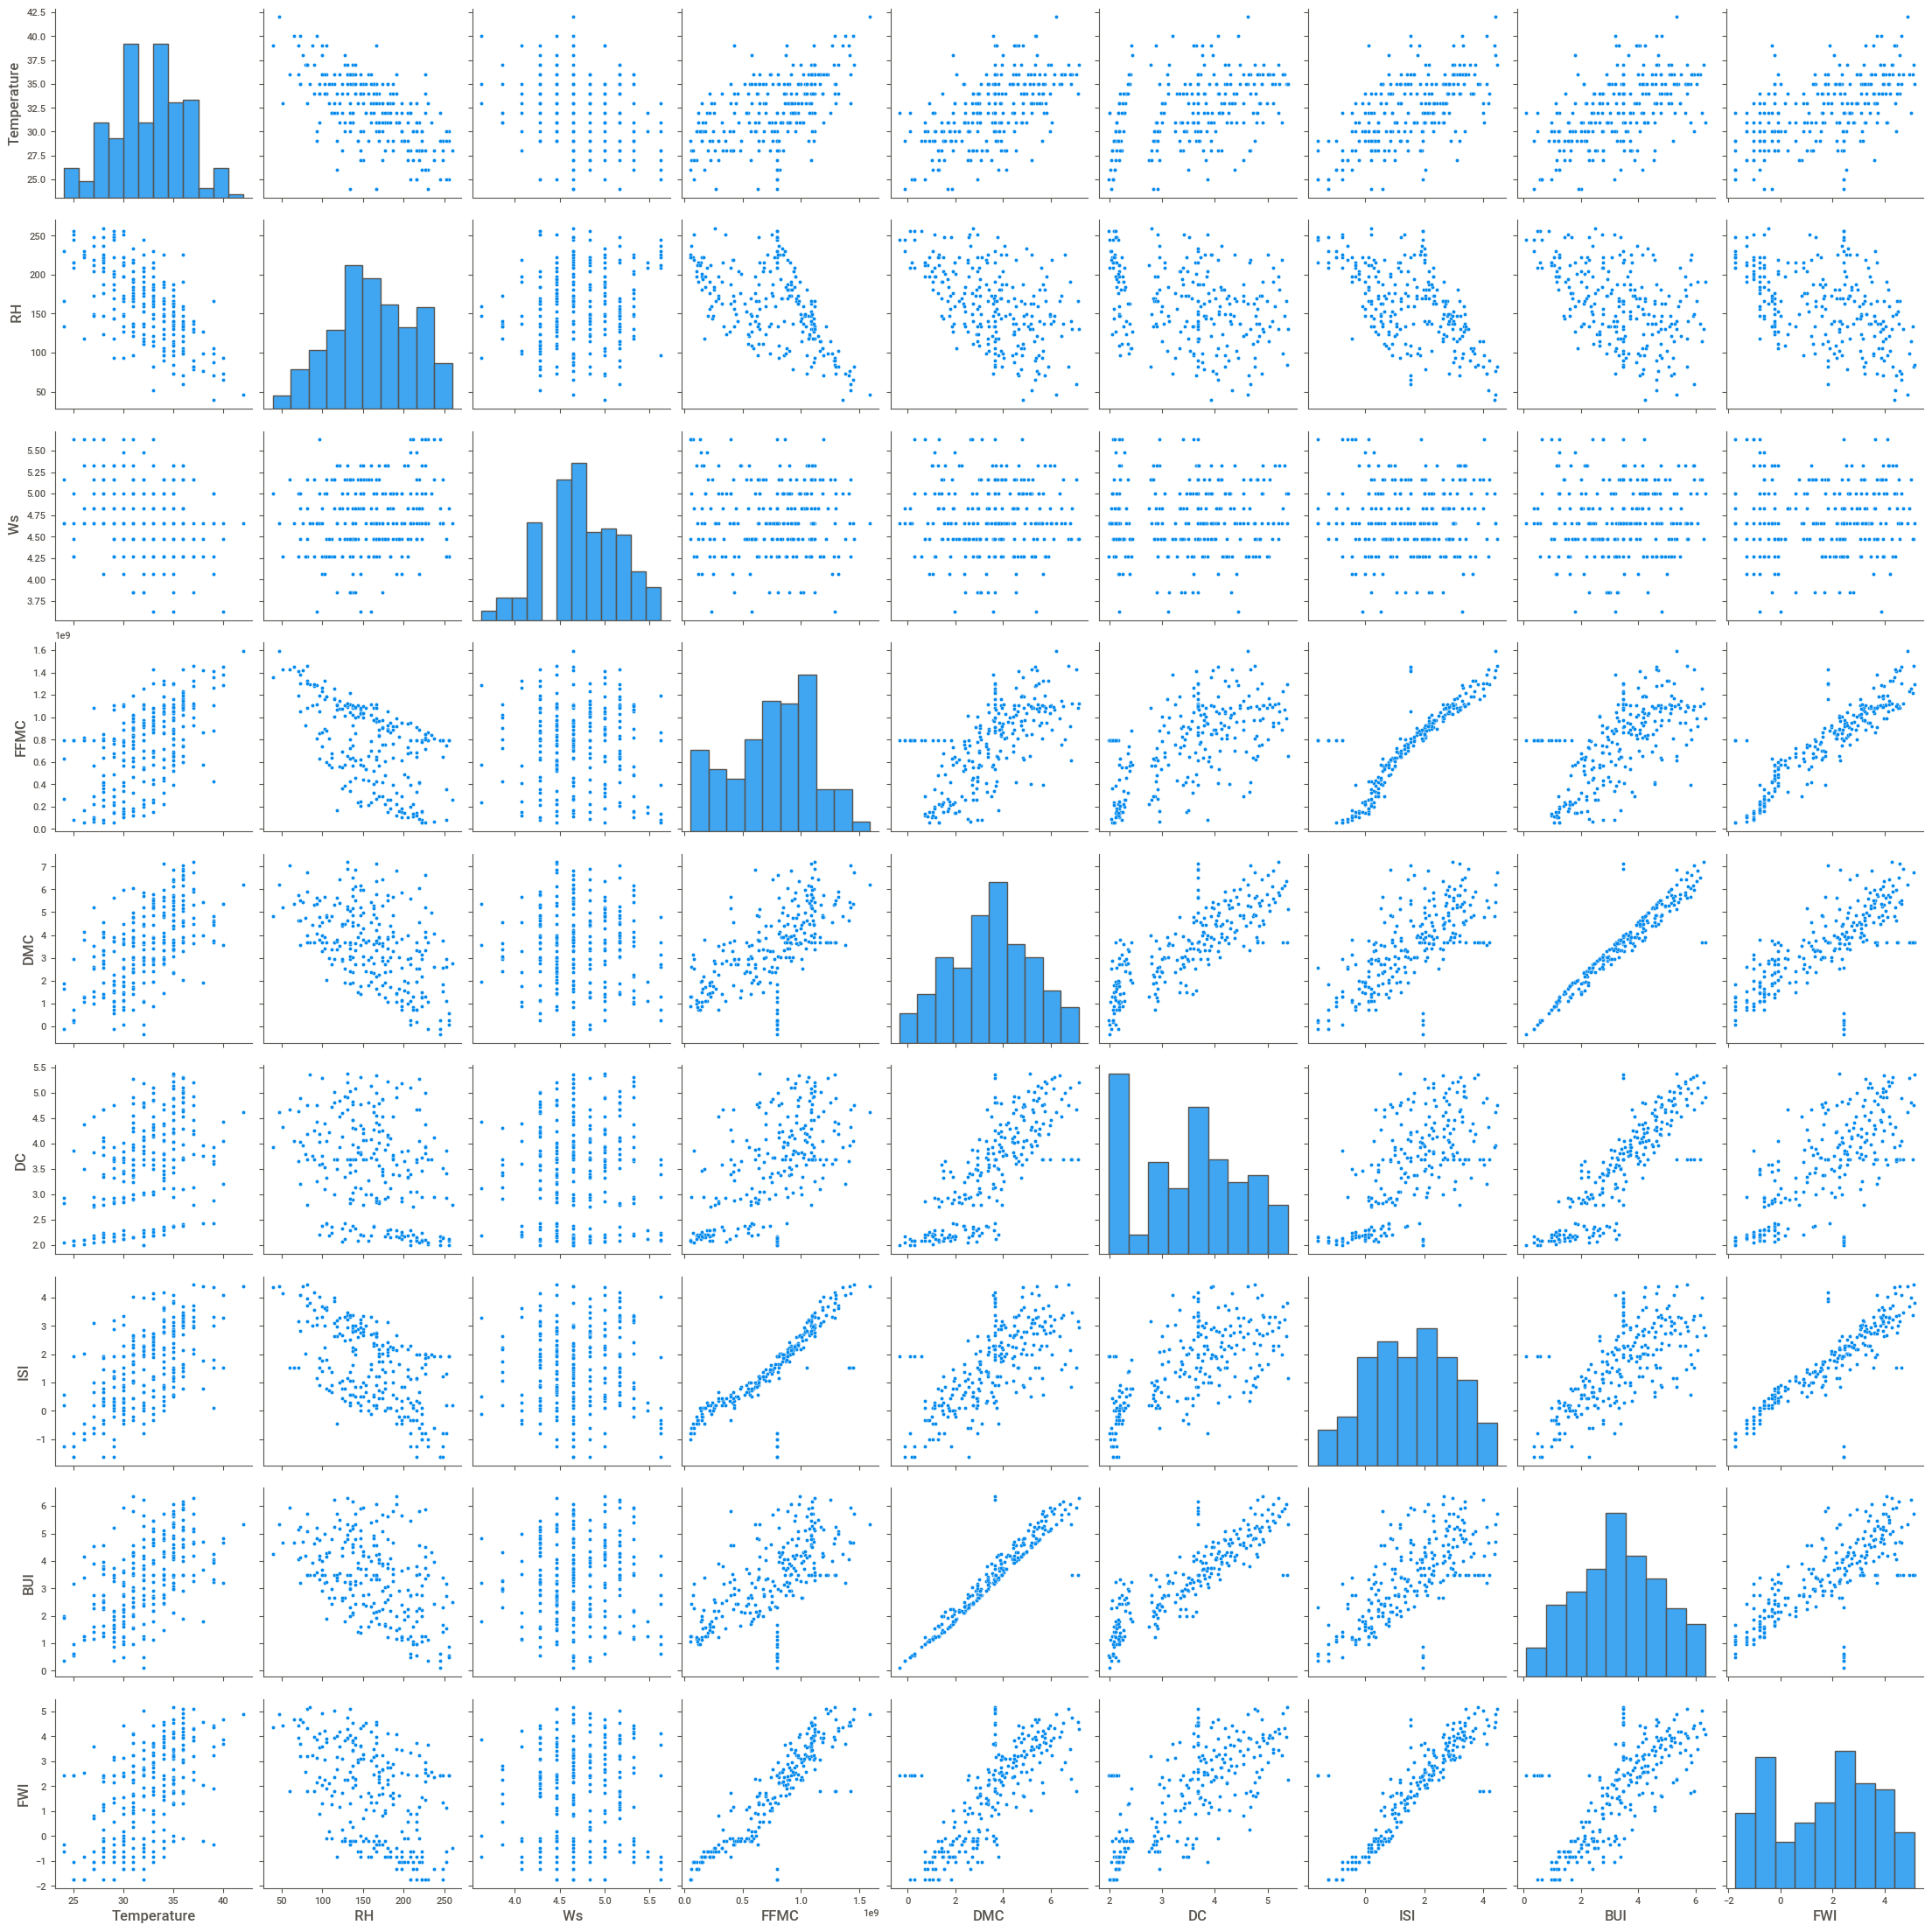

In [62]:
sns.pairplot(data)

## __Starting ML modeling with all transformetions__

### __Creating dummy for categorical data__

In [63]:
data_dummy = pd.get_dummies(data,drop_first=True)
data_dummy.head()

Temperature          RH        Ws          FFMC       DMC        DC  \
0         29.0  143.372066  5.165577  2.397096e+08  1.500687  2.088219   
1         29.0  156.584073  4.274100  2.169371e+08  1.787143  2.088219   
2         26.0  229.913004  4.652957  7.938513e+08  1.066187  2.016165   
3         25.0  255.688760  4.274100  7.938513e+08  0.273793  1.985954   
4         27.0  211.889717  4.830483  2.237512e+08  1.318603  2.756670   

        ISI       BUI       FWI  Rain _rain  Classes  _not fire  region_Bejaia  
0  0.273654  1.425881 -0.635298           0                   1              1  
1  0.000000  1.613893 -0.817037           1                   1              1  
2 -0.999762  1.123805 -1.741158           1                   1              1  
3  1.939132  0.566472  2.429965           1                   1              1  
4  0.187727  1.613893 -0.635298           0                   1              1

In [64]:
y = data_dummy["Classes  _not fire"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Classes  _not fire, dtype: uint8

In [65]:
X = data_dummy.drop(["Classes  _not fire"],axis=1)
X.head()

Temperature          RH        Ws          FFMC       DMC        DC  \
0         29.0  143.372066  5.165577  2.397096e+08  1.500687  2.088219   
1         29.0  156.584073  4.274100  2.169371e+08  1.787143  2.088219   
2         26.0  229.913004  4.652957  7.938513e+08  1.066187  2.016165   
3         25.0  255.688760  4.274100  7.938513e+08  0.273793  1.985954   
4         27.0  211.889717  4.830483  2.237512e+08  1.318603  2.756670   

        ISI       BUI       FWI  Rain _rain  region_Bejaia  
0  0.273654  1.425881 -0.635298           0              1  
1  0.000000  1.613893 -0.817037           1              1  
2 -0.999762  1.123805 -1.741158           1              1  
3  1.939132  0.566472  2.429965           1              1  
4  0.187727  1.613893 -0.635298           0              1

### __Spliting all data in training and testing data__

In [66]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(163, 11)
(81, 11)
(163,)
(81,)


### __Standardize the scalling of all data__

In [84]:
data.describe()

Temperature          RH          Ws          FFMC         DMC  \
count   244.000000  244.000000  244.000000  2.440000e+02  244.000000   
mean     32.254098  161.523372    4.715794  7.657288e+08    3.520849   
std       3.513786   49.228206    0.413556  3.613599e+08    1.691828   
min      24.000000   38.860636    3.629415  5.317822e+07   -0.336911   
25%      30.000000  127.237112    4.467800  5.287821e+08    2.365885   
50%      32.000000  163.286993    4.652957  7.986227e+08    3.678303   
75%      35.000000  198.595767    5.001140  1.049498e+09    4.784115   
max      42.000000  259.420891    5.626742  1.593463e+09    7.181914   

               DC         ISI         BUI         FWI  
count  244.000000  244.000000  244.000000  244.000000  
mean     3.511171    1.545551    3.351128    1.714493  
std      0.977107    1.430895    1.461055    1.916790  
min      1.985954   -1.631019    0.096426   -1.741158  
25%      2.675595    0.432850    2.246782   -0.216908  
50%      3.680945    1.539991    3.479520    2.064279  
75%      4.238154    2.703364    4.486560    3.256517  
max      5.381883    4.456251    6.356533    5.159718

In [85]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [87]:
log_reg.fit(X_train_std,y_train)

LogisticRegression()

In [88]:
y_predict = log_reg.predict(X_test_std)
y_predict

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0], dtype=uint8)

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9753086419753086

In [90]:
conf_mat = confusion_matrix(y_test,y_predict)
conf_mat

array([[45,  1],
       [ 1, 34]])

In [91]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [92]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.9753086419753086

In [93]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9782608695652174

In [94]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9782608695652174

In [95]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9782608695652174

In [96]:
auc = roc_auc_score(y_test, y_predict)
auc

0.9748447204968944